In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


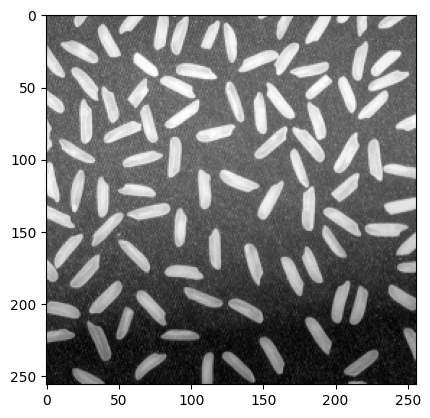

In [3]:
img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 이미지를 RGB 이미지로 변환

gImg= cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg,cmap='gray')

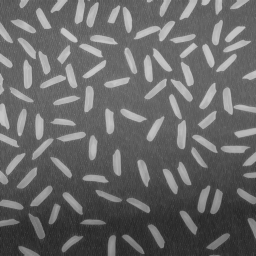

In [4]:
kernel = np.ones((3,1), np.uint8)
erodeImg = cv2.erode(gImg, kernel, iterations=1)
cv2_imshow(erodeImg)

In [5]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.ubyte)

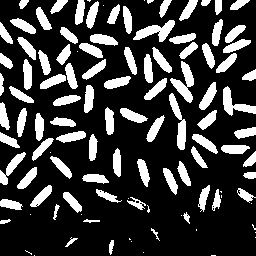

In [8]:
threshold =140

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if gImg[h,w] > threshold:
      gBin[h,w] = 255

cv2_imshow(gBin)

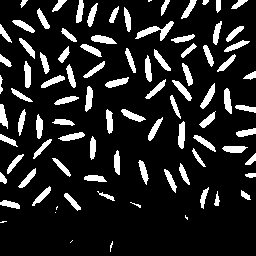

In [9]:
kernel = np.ones((3,3), np.uint8)
erodeImg = cv2.erode(gBin, kernel, iterations=1)
cv2_imshow(erodeImg)

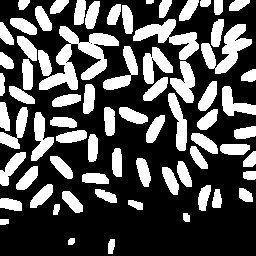

In [10]:
kernel = np.ones((3, 3), np.uint8)
dilateImg = cv2.dilate(erodeImg, kernel, iterations=2)
cv2_imshow(dilateImg)

In [13]:
num_labes, lavels = cv2.connectedComponents(dilateImg, 8)
print('number of labels:', num_labes)

number of labels: 73


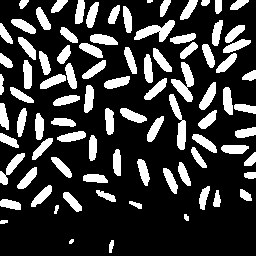

In [11]:
kernel = np.ones((3,3), np.uint8)
openImg = cv2.morphologyEx(gBin, cv2.MORPH_OPEN, kernel)
cv2_imshow(openImg)